In [93]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

In [69]:
data = pd.read_csv("cleaned_dataframe.csv")

# (i)

In [70]:
data["type"] = data["type"].astype(int)
data["iclevel"] = data["iclevel"].astype(int)
data["barrons"] = data["barrons"].astype(int)

In [71]:
data = pd.get_dummies(data, columns=["tier_name", "type", "iclevel", "barrons"], drop_first=True)

In [86]:
labels2013 =["par_median", 
             "k_median", 
             "par_q1", 
             "par_top1pc", 
             "kq5_cond_parq1", 
             "ktop1pc_cond_parq1",
             "mr_kq5_pq1",
             "mr_ktop1_pq1",
             "trend_parq1",
             "trend_bottom40",
             "count",
             "tier_name_Highly selective private",
             "tier_name_Highly selective public",
             "tier_name_Ivy Plus",
             "tier_name_Less than two-year schools of any type",
             "tier_name_Nonselective four-year private not-for-profit",
             "tier_name_Nonselective four-year public",
             "tier_name_Other elite schools (public and private)",
             "tier_name_Selective private",
             "tier_name_Selective public",
             "tier_name_Two-year (public and private not-for-profit)",
             "tier_name_Two-year for-profit",
             "type_2",
             "type_3",
             "iclevel_2",
             "iclevel_3",
             "public",
             "barrons_2",
             "barrons_3",
             "barrons_4",
             "barrons_5",
             "barrons_9",
             "barrons_999",
             "exp_instr_pc_2013",
             "hbcu",
             "ipeds_enrollment_2013",
             "sticker_price_2013",
             "grad_rate_150_p_2013",
             "avgfacsal_2013",
             "scorecard_netprice_2013",
             "scorecard_median_earnings_2011",
             "exp_instr_2012",
             "asian_or_pacific_share_fall_2000",
             "black_share_fall_2000",
             "hisp_share_fall_2000",
             "alien_share_fall_2000",
             "pct_arthuman_2000",
             "pct_business_2000",
             "pct_health_2000",
             "pct_multidisci_2000",
             "pct_publicsocial_2000",
             "pct_stem_2000",
             "pct_socialscience_2000",
             "pct_tradepersonal_2000"
            ]

data2013 = data[labels2013]

target2013 = data["awards_13"]/data["recipients_13"]
target2013 = target2013.fillna(0)

In [77]:
labels2000 =["par_median", 
             "k_median", 
             "par_q1", 
             "par_top1pc", 
             "kq5_cond_parq1", 
             "ktop1pc_cond_parq1",
             "mr_kq5_pq1",
             "mr_ktop1_pq1",
             "trend_parq1",
             "trend_bottom40",
             "count",
             "tier_name_Highly selective private",
             "tier_name_Highly selective public",
             "tier_name_Ivy Plus",
             "tier_name_Less than two-year schools of any type",
             "tier_name_Nonselective four-year private not-for-profit",
             "tier_name_Nonselective four-year public",
             "tier_name_Other elite schools (public and private)",
             "tier_name_Selective private",
             "tier_name_Selective public",
             "tier_name_Two-year (public and private not-for-profit)",
             "tier_name_Two-year for-profit",
             "type_2",
             "type_3",
             "iclevel_2",
             "iclevel_3",
             "public",
             "barrons_2",
             "barrons_3",
             "barrons_4",
             "barrons_5",
             "barrons_9",
             "barrons_999",
             "exp_instr_pc_2000",
             "hbcu",
             "ipeds_enrollment_2000",
             "sticker_price_2000",
             "grad_rate_150_p_2002",
             "avgfacsal_2001",
             "scorecard_median_earnings_2011",
             "exp_instr_2000",
             "asian_or_pacific_share_fall_2000",
             "black_share_fall_2000",
             "hisp_share_fall_2000",
             "alien_share_fall_2000",
             "pct_arthuman_2000",
             "pct_business_2000",
             "pct_health_2000",
             "pct_multidisci_2000",
             "pct_publicsocial_2000",
             "pct_stem_2000",
             "pct_socialscience_2000",
             "pct_tradepersonal_2000"
            ]

data2000 = data[labels2000]

target2000 = data["awards_01"]/data["recipients_01"]
target2000 = target2000.fillna(0)

In [74]:
regr = RandomForestRegressor(oob_score=True)
regr.fit(data2000.values, target2000)
regr.oob_score_

0.4394238575160989

In [75]:
grid = [(n_estimators, depth, features) for n_estimators in [100, 200, 300, 400] for depth in [2, 3, 4, 5, None] for features in ["auto", "sqrt", "log2", 1, 10, 15, 20, 30]]

best_model = None
best_oob_score = 0
for n_est, depth, features in grid:
    rf = RandomForestRegressor(oob_score=True, n_estimators=n_est, max_depth=depth, max_features=features)
    rf.fit(data2000.values, target2000)
    if rf.oob_score_ > best_oob_score:
        best_model = rf
        best_oob_score = rf.oob_score_

In [90]:
best_model.oob_score_

0.4197822434245042

# (ii)

In [94]:
X_train, X_test, y_train, y_test = train_test_split(data2013, target2013, test_size=.2)

In [97]:
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_test, y_test)

0.2930778073999891

It appears to me that compared to below, the Random Forest might do a little better than the OLS. It's hard to tell though since I'm comparing an R^2 estimation to an OOB score.

# (iii)

<BarContainer object of 53 artists>

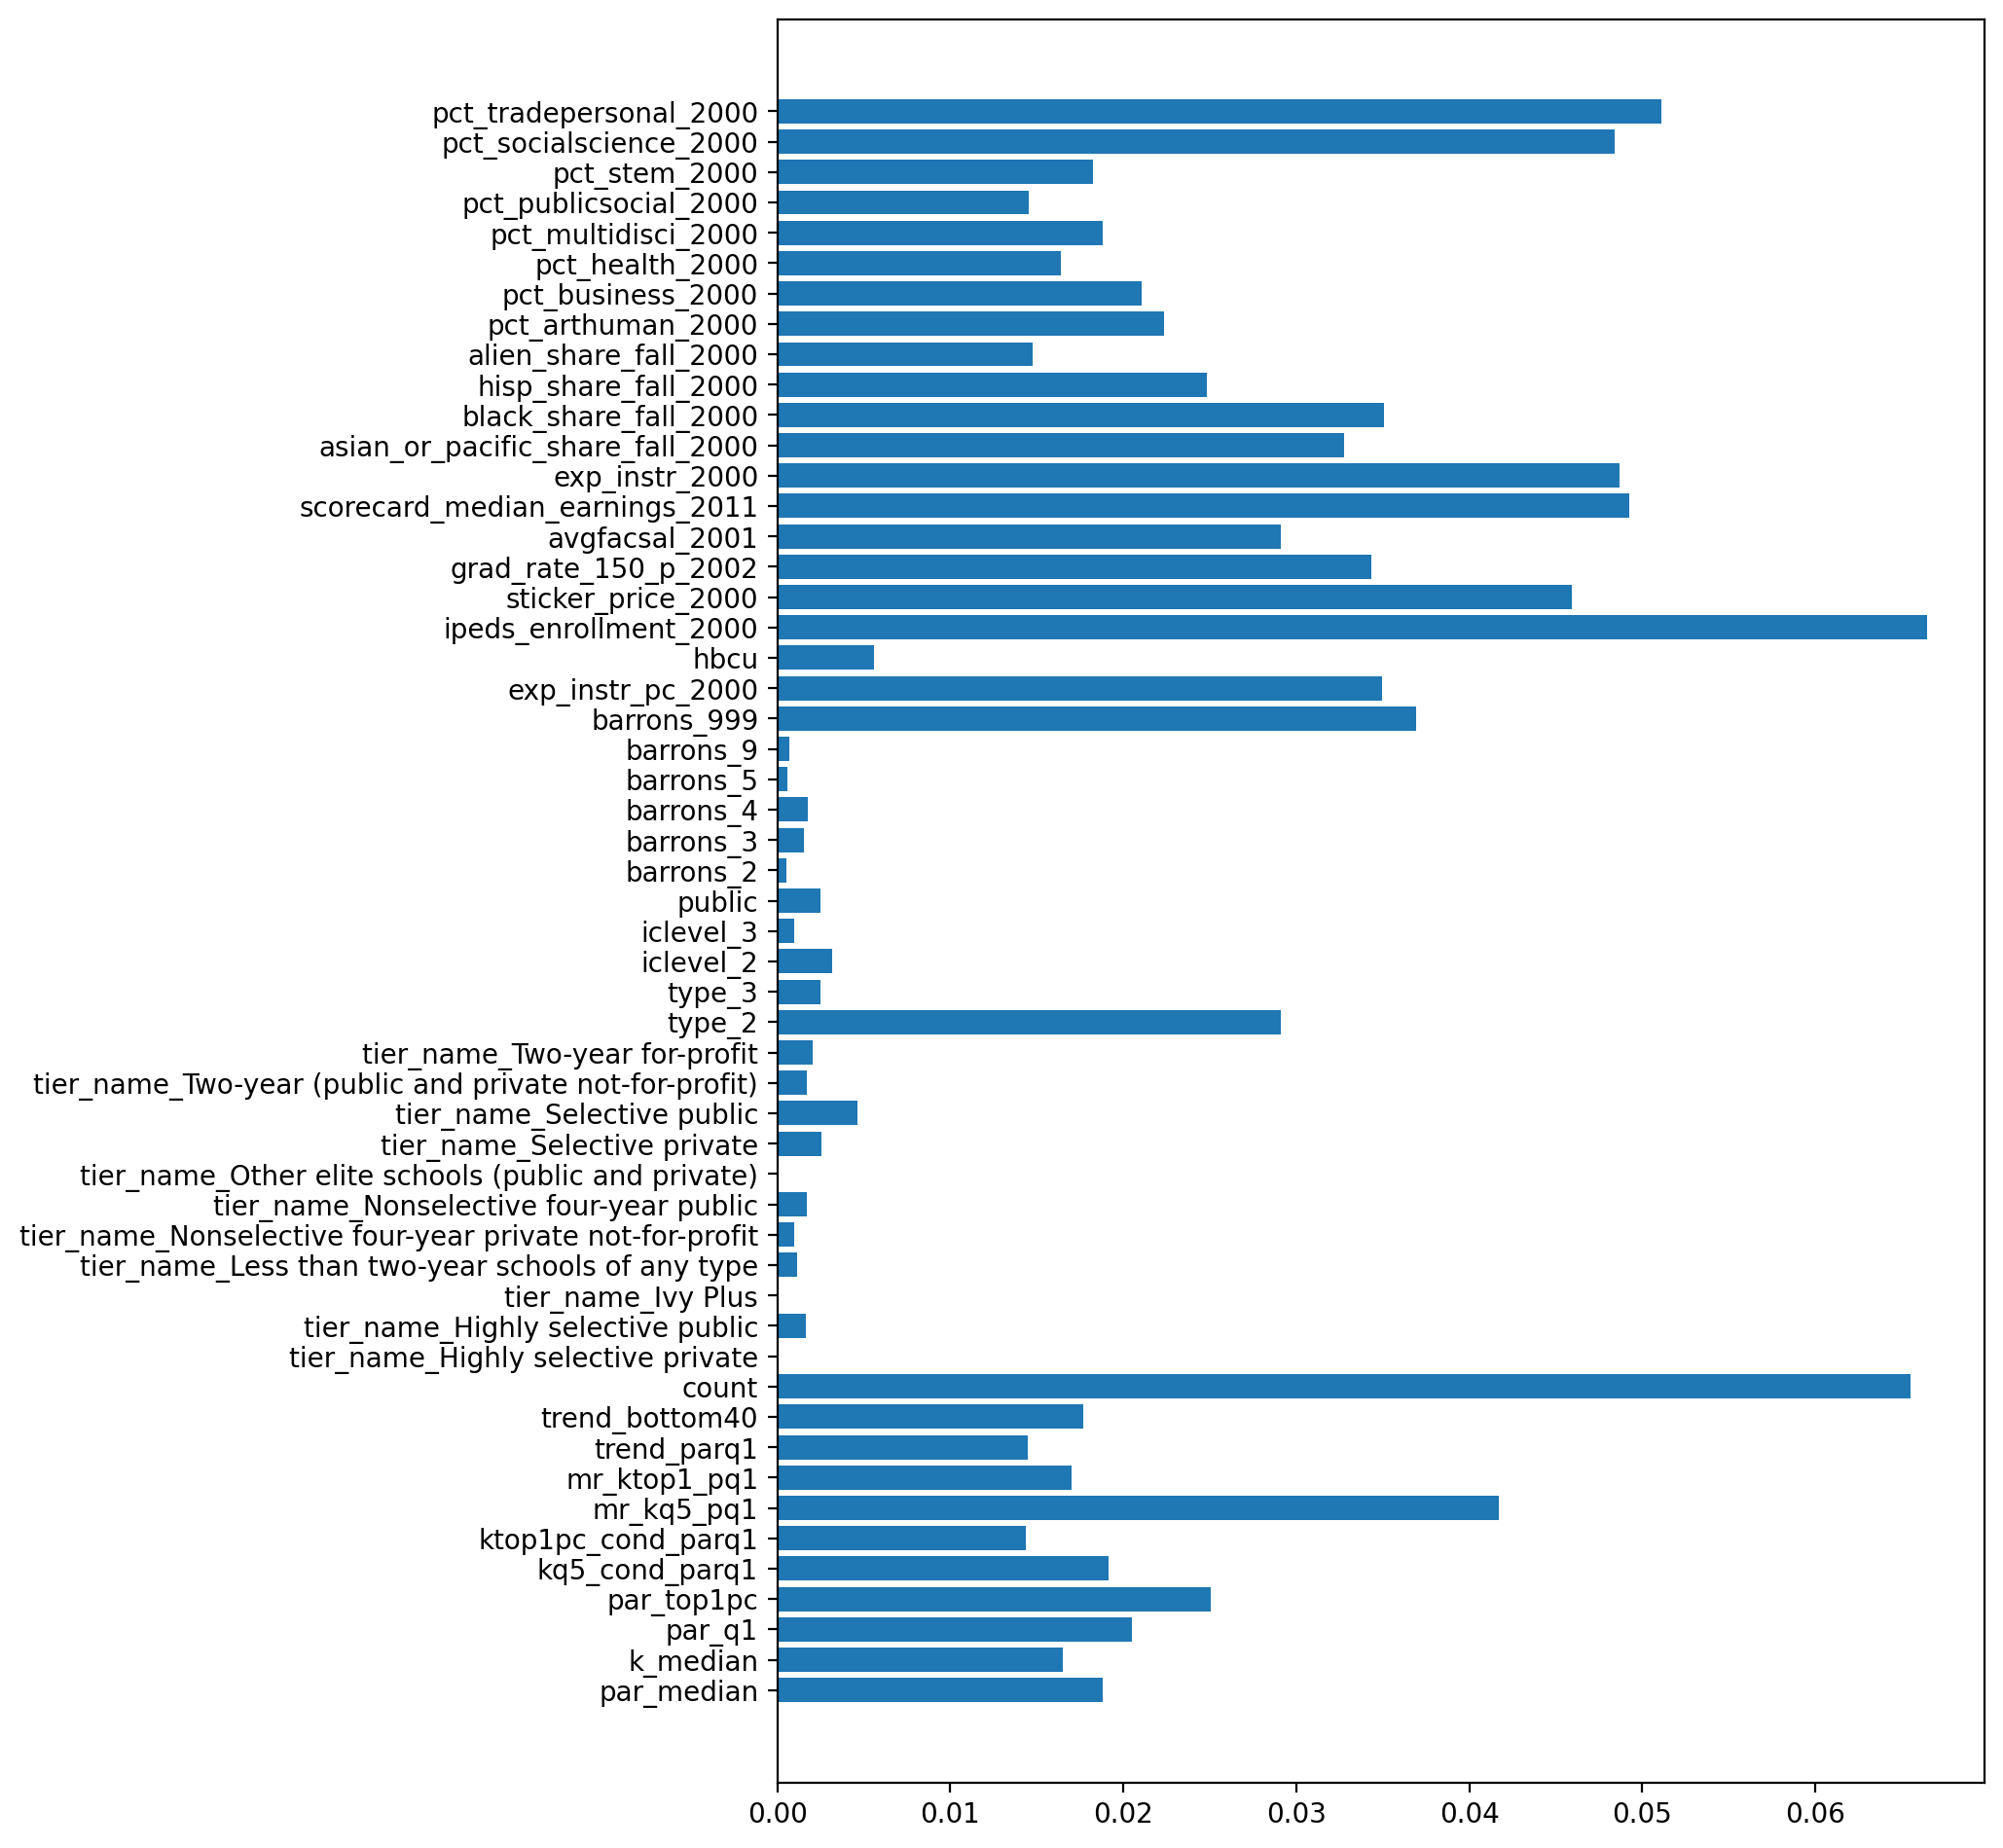

In [81]:
fig = plt.figure(figsize=(8, 12), dpi=200)
plt.barh(labels2000, best_model.feature_importances_)

In [87]:
grid = [(n_estimators, depth, features) for n_estimators in [100, 200, 300, 400] for depth in [2, 3, 4, 5, None] for features in ["auto", "sqrt", "log2", 1, 10, 15, 20, 30]]

best_model = None
best_oob_score = 0
for n_est, depth, features in grid:
    rf = RandomForestRegressor(oob_score=True, n_estimators=n_est, max_depth=depth, max_features=features)
    rf.fit(data2013.values, target2013)
    if rf.oob_score_ > best_oob_score:
        best_model = rf
        best_oob_score = rf.oob_score_

In [88]:
best_model.oob_score_

0.4197822434245042

<BarContainer object of 54 artists>

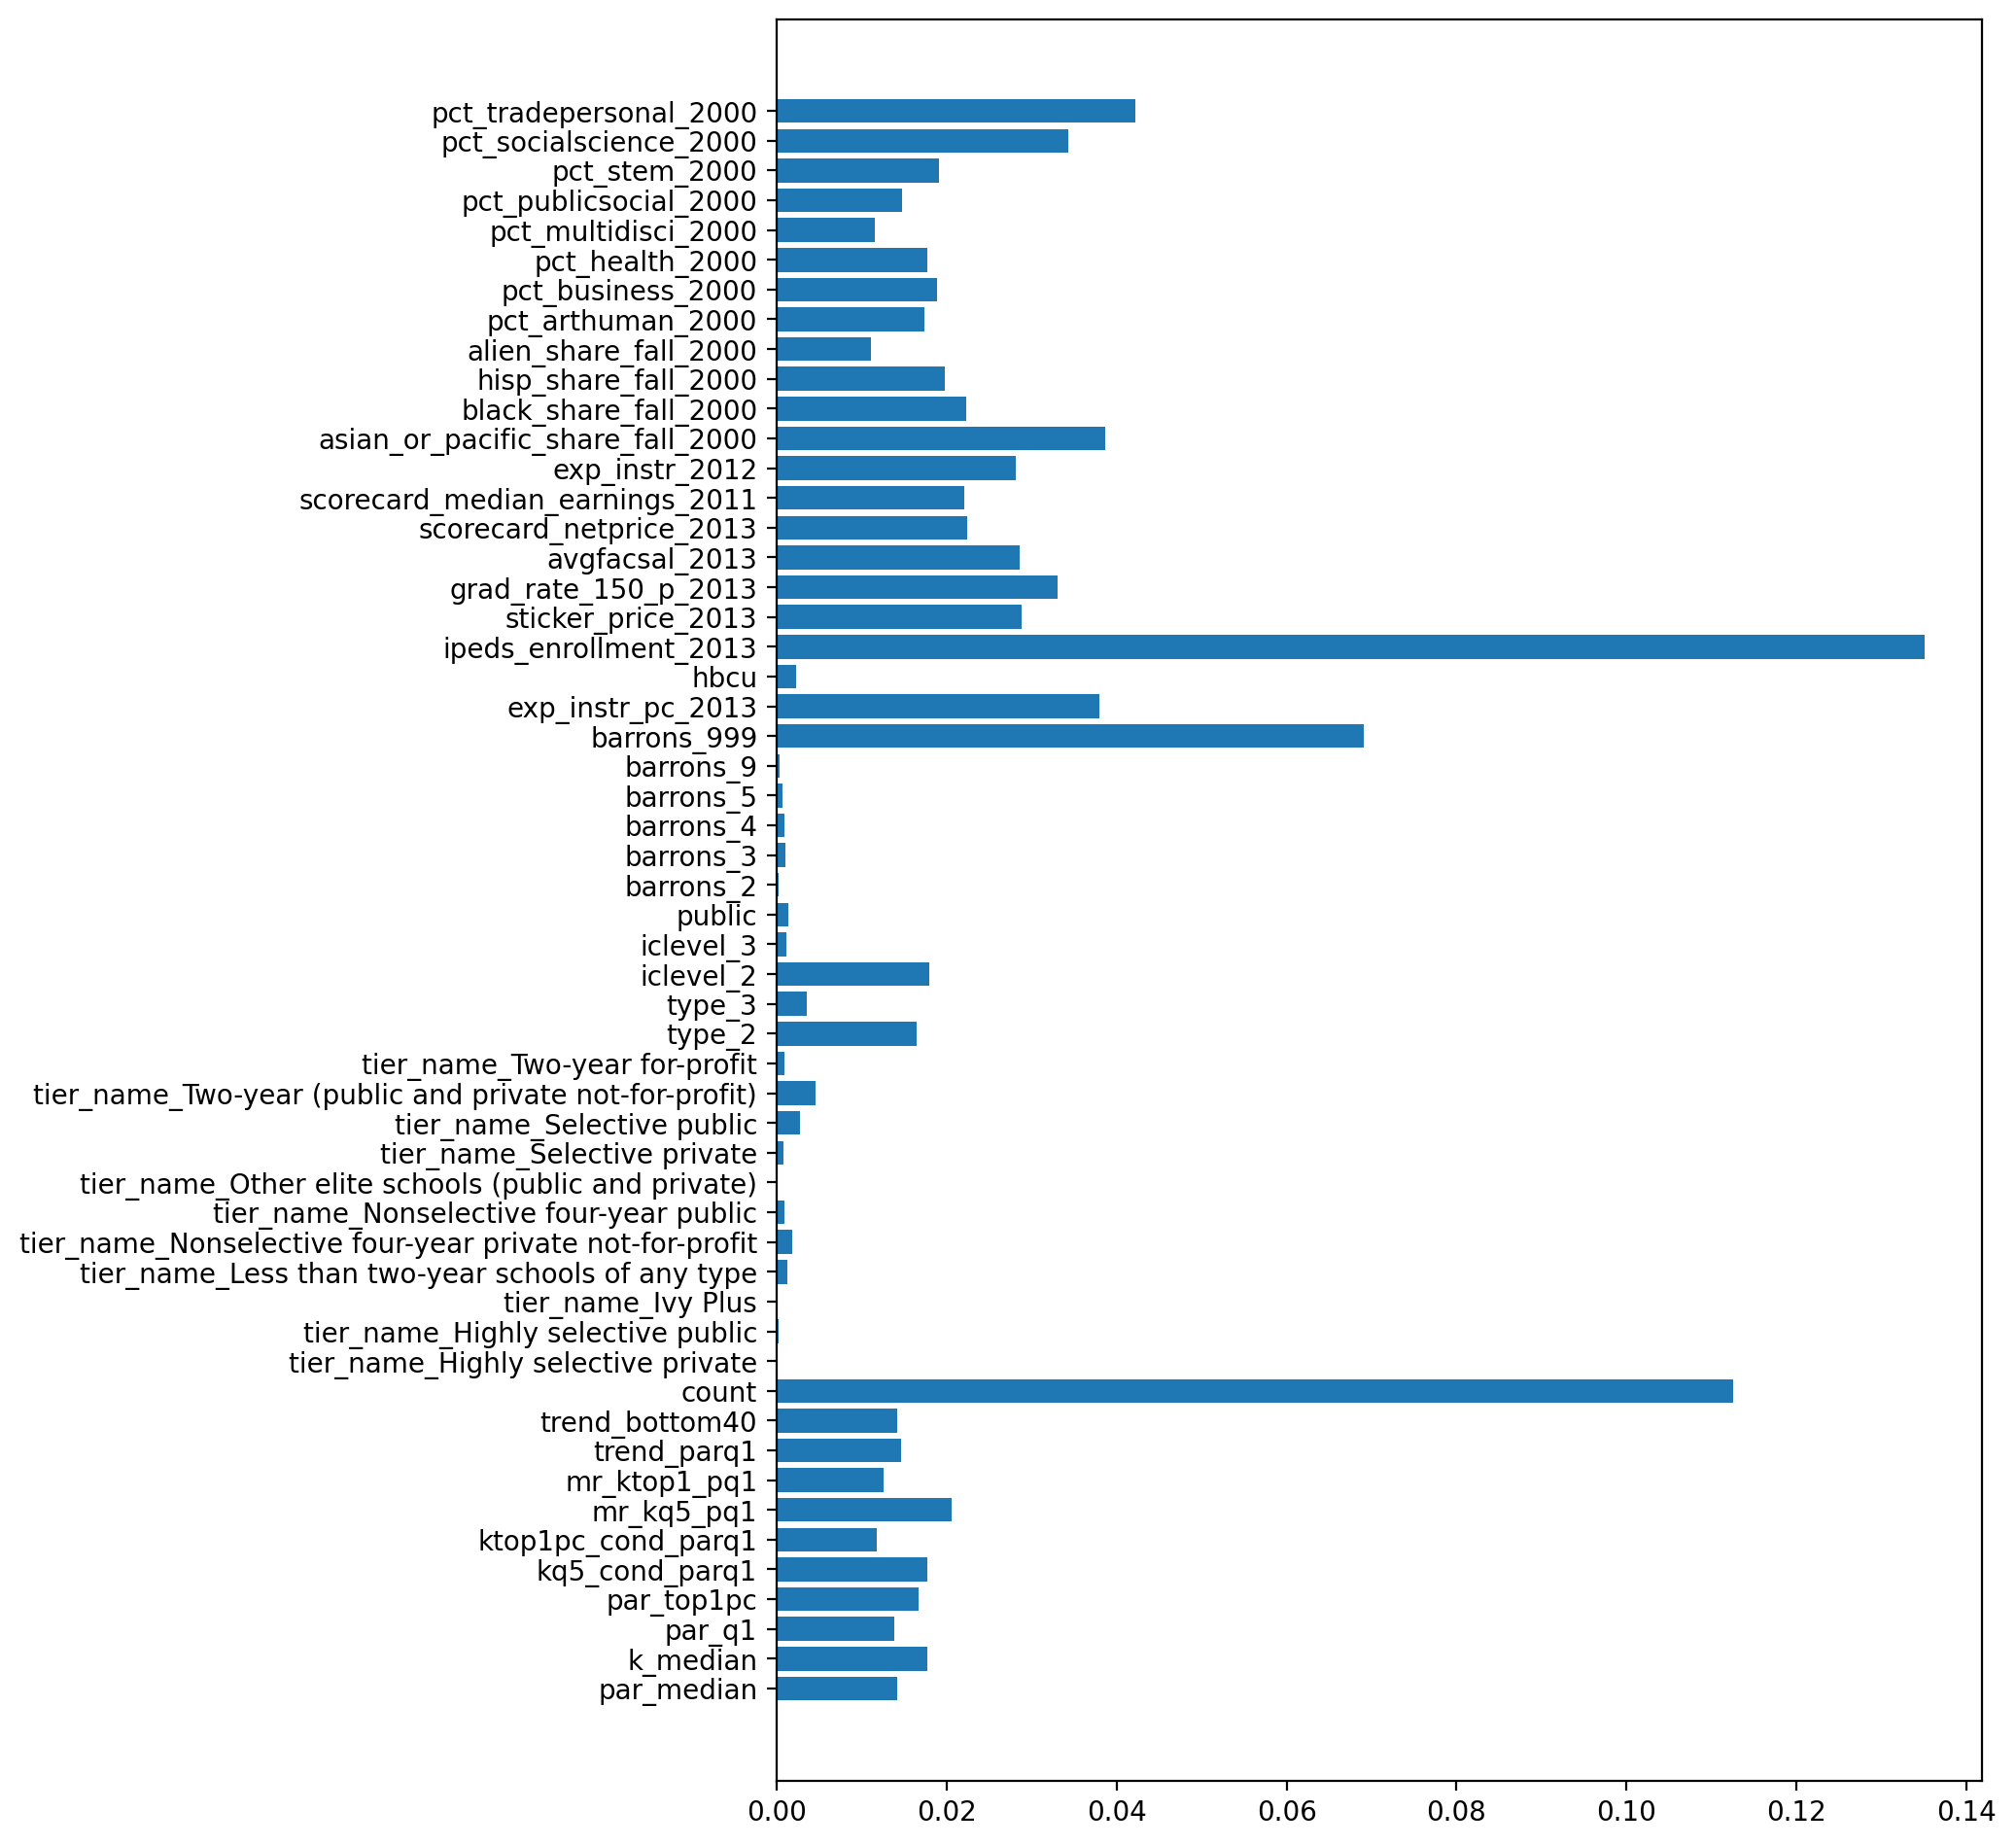

In [89]:
fig = plt.figure(figsize=(8, 12), dpi=200)
plt.barh(labels2013, best_model.feature_importances_)

In [91]:
importances = best_model.feature_importances_
print("The three most important features:")
for _ in range(3):
    ma = np.argmax(importances)
    print(labels2013[ma])
    importances[ma] = 0

The three most important features:
ipeds_enrollment_2013
count
barrons_999


In [92]:
importances = best_model.feature_importances_
print("The three least important features:")
for _ in range(3):
    ma = np.argmin(importances)
    print(labels2013[ma])
    importances[ma] = np.inf

The three least important features:
tier_name_Ivy Plus
tier_name_Highly selective private
tier_name_Other elite schools (public and private)


# Other stuff

In [67]:
regr.predict(X_test)

array([1589.48027713, 1492.92246688, 2066.17147639, 1672.89407517,
       1771.16994932, 1253.29665305, 2258.16843825, 1719.01677423,
       2033.24906272, 1253.81714058, 1768.10062067, 2073.47813728,
       1783.33182005, 2107.24102973, 1673.5929687 , 1509.45308676,
       2261.17314995, 1607.86338165, 1929.48435173, 1428.22089531,
       1667.69468587, 2012.68583741, 1245.31874451, 2130.17781824,
        422.31130646, 1987.72902878, 1505.22929087, 1972.5928688 ,
       1685.48534457, 1559.28016716, 2037.7891273 , 1195.81728615,
       1739.27403067, 1706.84849595, 1480.51728934, 1774.32167772,
       1620.40404635,  350.3293145 , 2386.71360477, 1871.26262777,
       1740.35900254, 1554.55333451, 1188.55794197, 1968.23378858,
       2051.61914437, 1854.52967066, 1859.70626884,  849.27879226,
       1989.70073189, 1704.05808389, 1750.34141954, 1741.0021122 ,
       1672.38405064, 1993.84136477, 1765.43135458, 1164.36864283,
        483.33534251, 1991.23266086, 2462.47179978, 1675.27963

In [64]:
regr.score(X_test, y_test)

0.3385783739762992

In [85]:
for i in zip(data.columns, data.iloc[1]):
    print(*i, sep="\t\t")

super_opeid		727300
par_median		42800.0
k_median		57600.0
par_q1		27.632242
par_top1pc		0.55920202
kq5_cond_parq1		46.824234
ktop1pc_cond_parq1		2.5568271
mr_kq5_pq1		12.938586
mr_ktop1_pq1		0.70650864
trend_parq1		-9.1865492
trend_bottom40		-12.297223
count		1083.0
name		CUNY Bernard M. Baruch College
region		1.0
state		NY
fips		36.0
cz		19400.0
czname		New York
cfips		36061.0
county		New York
zip		10010.0
tier		5.0
public		1.0
exp_instr_pc_2000		3385.4727
exp_instr_pc_2013		6754.6748
multi		0.0
hbcu		0.0
flagship		0.0
ipeds_enrollment_2013		14082.0
ipeds_enrollment_2000		15698.0
sticker_price_2013		6561.0
sticker_price_2000		3350.0
grad_rate_150_p_2013		0.4490329940818665
grad_rate_150_p_2002		0.44702158066053704
avgfacsal_2013		8651.0
avgfacsal_2001		48525.34803171433
sat_avg_2013		1235.0
sat_avg_2001		1050.0
scorecard_netprice_2013		5148.0
scorecard_median_earnings_2011		54000.0
exp_instr_2012		50939508.57732953
exp_instr_2000		28764881.21291422
asian_or_pacific_share_fall_2000		0.

In [52]:
data2000.columns

Index(['par_median', 'k_median', 'par_q1', 'par_top1pc', 'kq5_cond_parq1',
       'ktop1pc_cond_parq1', 'mr_kq5_pq1', 'mr_ktop1_pq1', 'trend_parq1',
       'trend_bottom40', 'count', 'tier_name_Highly selective private',
       'tier_name_Highly selective public', 'tier_name_Ivy Plus',
       'tier_name_Less than two-year schools of any type',
       'tier_name_Nonselective four-year private not-for-profit',
       'tier_name_Nonselective four-year public',
       'tier_name_Other elite schools (public and private)',
       'tier_name_Selective private', 'tier_name_Selective public',
       'tier_name_Two-year (public and private not-for-profit)',
       'tier_name_Two-year for-profit', 'type_2', 'type_3', 'iclevel_2',
       'iclevel_3', 'public', 'barrons_2', 'barrons_3', 'barrons_4',
       'barrons_5', 'barrons_9', 'barrons_999', 'exp_instr_pc_2000', 'hbcu',
       'ipeds_enrollment_2000', 'sticker_price_2000', 'grad_rate_150_p_2002',
       'avgfacsal_2001', 'scorecard_median_earn

In [7]:
for column in data:
    print(column)
    print("---------")
    print(data[column].value_counts())
    print()

super_opeid
---------
319600     1
968400     1
1167200    1
243000     1
136500     1
          ..
250100     1
216000     1
2333000    1
2508300    1
102400     1
Name: super_opeid, Length: 2466, dtype: int64

par_median
---------
66000.0     11
64400.0      9
72600.0      8
85200.0      8
75500.0      8
            ..
95600.0      1
110800.0     1
130900.0     1
119400.0     1
35500.0      1
Name: par_median, Length: 911, dtype: int64

k_median
---------
28700.0    17
28400.0    16
30900.0    16
30100.0    16
27200.0    15
           ..
83600.0     1
42900.0     1
14900.0     1
19100.0     1
57600.0     1
Name: k_median, Length: 515, dtype: int64

par_q1
---------
15.875215    1
2.908032     1
11.316989    1
15.143771    1
4.197385     1
            ..
9.032391     1
6.337598     1
4.604358     1
8.449297     1
27.978601    1
Name: par_q1, Length: 2202, dtype: int64

par_top1pc
---------
0.050522    27
0.000000    16
0.684590     1
0.609481     1
0.148753     1
            ..
0.2245

0.0       99
397.0      6
382.0      6
1644.0     5
577.0      5
          ..
546.0      1
2252.0     1
274.0      1
506.0      1
980.0      1
Name: recipients_12, Length: 1822, dtype: int64

awards_12
---------
0.0           99
13915208.0     1
2017923.0      1
5089777.0      1
1911415.0      1
              ..
4135534.0      1
2206445.0      1
6772178.0      1
3554199.0      1
5226456.0      1
Name: awards_12, Length: 2368, dtype: int64

recipients_13
---------
0.0        99
454.0       6
475.0       6
543.0       5
378.0       5
           ..
1995.0      1
1457.0      1
14186.0     1
4055.0      1
10560.0     1
Name: recipients_13, Length: 1804, dtype: int64

awards_13
---------
0.0           99
5007747.0      1
7088809.0      1
1240149.0      1
1206950.0      1
              ..
23025098.0     1
10201821.0     1
1135961.0      1
3517103.0      1
4350539.0      1
Name: awards_13, Length: 2368, dtype: int64

recipients_14
---------
0.0       102
379.0       5
516.0       5
711.0      

In [11]:
for i in data["par_median"].value_counts():
    print(i)

11
9
8
8
8
8
8
8
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2